<a href="https://colab.research.google.com/github/2ood/prml/blob/main/handwriting_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Download sample data

In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [4]:
((image_train_raw, label_train_raw), (image_test_raw, image_test_raw)) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
image_train_raw.shape

(60000, 28, 28)

In [17]:
class Model :
  def __init__(self, learning_rate, weight_0_scale, weight_1_scale) :
    self.LEARNING_RATE = learning_rate

    self.UNIT_NUM_0 = 28*28 ## number of units in first layer = raw trainset
    self.UNIT_NUM_1 = 28
    self.UNIT_NUM_2 = 10

    ## initialize with gaussian normal
    self.weight_0 = np.random.normal(loc = 0.0, scale = weight_0_scale, size = [self.UNIT_NUM_1,self.UNIT_NUM_0]) ## [28,784]
    self.weight_1 = np.random.normal(loc = 0.0, scale = weight_1_scale, size = [self.UNIT_NUM_2,self.UNIT_NUM_1]) ## [28,10]

    self.del_weight_0 = np.empty(self.weight_0.shape)
    self.del_weight_1 = np.empty(self.weight_1.shape)

    self.UNIT_0 = np.empty(self.UNIT_NUM_0) ## make it row vector
    self.UNIT_1 = np.empty(self.UNIT_NUM_1)
    self.UNIT_2 = np.empty(self.UNIT_NUM_2)

    self.a_1 = np.empty(self.UNIT_NUM_1)
    self.a_2 = np.empty(self.UNIT_NUM_2)

  
  def activation(self, arg) :
    return self.sigmoid(arg)

  def activation_derivative(self,arg) :
    sig = self.sigmoid(arg)
    return sig*(1-sig)

  def sigmoid(self,arg) :
    return 1.0/(1+np.exp(-arg)) 

  def t_vector(self,t,length):
    result = np.zeros(length)
    result[t] = 1
    return result

  def forwardprop(self, input):
    preprocessed = (input/256.0)
    preprocessed = preprocessed.reshape([28*28,])
    preprocessed[28*28-1] = 1

    self.UNIT_0 = preprocessed

    self.a_1 = self.weight_0.dot(self.UNIT_0)

    for i in np.arange(self.UNIT_NUM_1) :
        self.UNIT_1[i] = self.activation(self.a_1[i])

    self.a_2 = self.weight_1.dot(self.UNIT_1) 

    for i in np.arange(self.UNIT_NUM_2) :
        self.UNIT_2[i] = self.sigmoid(self.a_2[i])
    
    return self.UNIT_2


  def backprop(self, t) :
    t_vec = self.t_vector(t,self.UNIT_NUM_2)
    del_2 = self.UNIT_2 - t_vec
    del_1 = np.empty(self.UNIT_NUM_1)
    
    z= np.transpose(del_2).dot(self.weight_1)

    for i in np.arange(self.UNIT_NUM_1):
        del_1[i] = self.activation_derivative(self.a_1[i]) * z[i]

    self.del_weight_1 = np.empty(self.weight_1.shape)
    self.del_weight_0 = np.empty(self.weight_0.shape)

    for i in np.arange(self.UNIT_NUM_2) :
      for j in np.arange(self.UNIT_NUM_1) :
        self.del_weight_1[i][j] = del_2[i]*self.UNIT_1[j]

    for i in np.arange(self.UNIT_NUM_1) :
      for j in np.arange(self.UNIT_NUM_0) :
        self.del_weight_0[i][j] = del_1[i]*self.UNIT_0[j]

    self.weight_0 -= self.LEARNING_RATE * self.del_weight_0
    self.weight_1 -= self.LEARNING_RATE * self.del_weight_1

  def guess(self, input) :
    y = self.forwardprop(input)
    index_of_max = 0
    sum = 0
    for i in np.arange(self.UNIT_NUM_2):
      sum += y[i]
      index_of_max = i if y[index_of_max] < y[i] else index_of_max
    
    return (f'I think it is {index_of_max}. I am {(y[index_of_max] / sum * 100).round(decimals = 1)} % sure')


In [8]:
image_train = np.reshape(image_train_raw,[60000, 28 * 28])
label_train = np.reshape(label_train_raw,[60000,1])

In [18]:
m = Model(learning_rate = 0.01, weight_0_scale = 0.1,weight_1_scale = 0.3)

ind = 0;

I think it is 5. I am 39.4 % sure
[0.018  0.0036 0.0005 0.0187 0.0187 0.1773 0.0222 0.0012 0.0804 0.1091]
currently trained till 10000


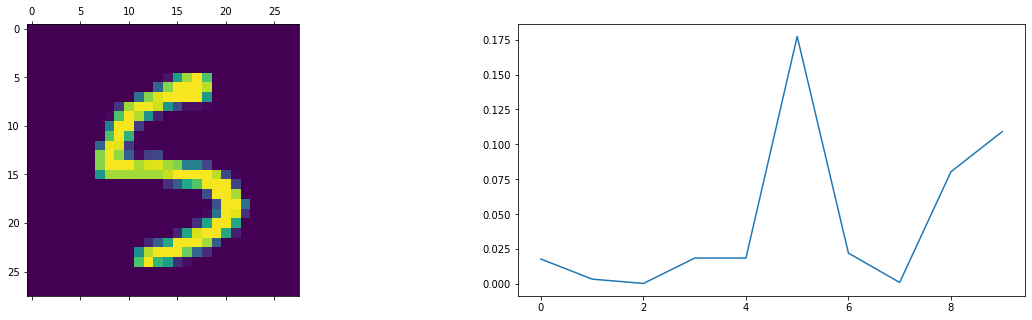

In [28]:
for i in range(1000*ind,1000*(ind+1)) :
  input = image_train[i]
  t = label_train[i][0]
  y = m.forwardprop(input)
  m.backprop(t)

ind +=1

index = 15000

figure = plt.figure()
figure.set_size_inches(20,5)

axes = []
axes.append(figure.add_subplot(1, 2, 1))
axes.append(figure.add_subplot(1,2,2))
axes[0].matshow(image_train_raw[index])

print(m.guess(image_train[index]))
#print(m.weight_0)
#print('a_1 is')
#print(m.a_1)
#print(m.UNIT_1)
#print(m.a_2)
print(m.UNIT_2.round(decimals=4))
print(f'currently trained till {ind*1000}')
axes[1].plot(m.UNIT_2)